# 17. Matplotlib 퀴즈

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'       
matplotlib.rcParams['font.size'] = 15                     
matplotlib.rcParams['axes.unicode_minus'] = False

import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


### 1. 영화 데이터를 활용해서 x,y가 각각 영화, 평점인 막대그래프를 만드시오

<BarContainer object of 8 artists>

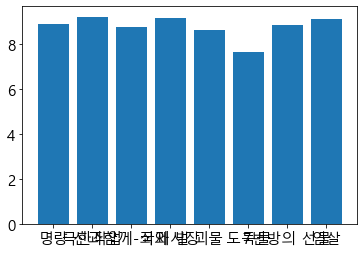

In [2]:
plt.bar(df['영화'],df['평점'])

### 2. 앞에서 만든 그래프를 제시된 세부 사항을 적용하시오
- 제목 : 국내 top8 영화평점 정보
- x축 라벨 : 영화 (90도 회전)
- y축 라벨 : 평점

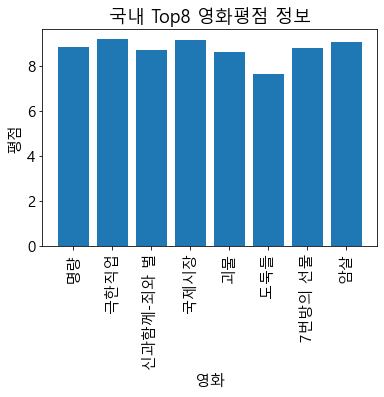

In [4]:
plt.bar(df['영화'],df['평점'])
plt.title("국내 Top8 영화평점 정보")
plt.xticks(df['영화'],rotation=90)
plt.xlabel("영화")
plt.ylabel("평점")
plt.show()

### 3. 개봉연도별 평점 변화 추이를 꺽은선 그래프로 그리시오

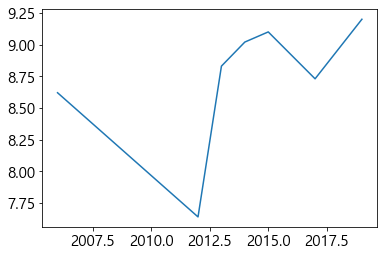

In [25]:
year_score = df.groupby("개봉 연도").mean()['평점']
years = list(year_score.keys())
scores = list(year_score.values)
plt.plot(years,scores)

### 4. 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오
- marker = o 
- x축 눈금 : 5년 단위 
- y축 범위 : 최소 7~ 최대 10

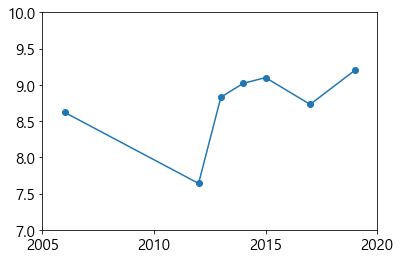

In [30]:
year_score = df.groupby("개봉 연도").mean()['평점']
plt.plot(year_score.keys(),year_score, marker="o")
plt.xticks([2005,2010,2015,2020])
plt.ylim(7,10)
plt.show()

### 5. 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 제시된 세부 사항을 적용하여 그리시오.
- label : 9점이상 / 9점 미만
- 퍼센트 : 소수점 첫번째 자리까지 표시
- 범례 : 그래프 우측에 표시

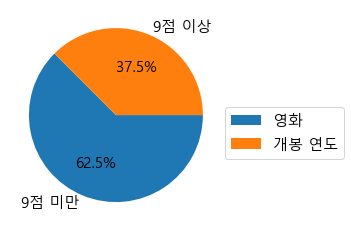

In [59]:
def nine_score(score):
    return "9점 이상" if score>=9.0 else "9점 미만"

df['9점up_down'] = df['평점'].apply(nine_score)

df_group = df.groupby('9점up_down').size()


plt.pie(list(df_group.values), 
        labels=list(df_group.index),
        autopct="%.1f%%",
        startangle=135
        )
plt.legend(list(df.keys()), loc=(1,0.3))
plt.show()
